# Three-states MDP example

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# Copyright (c) 2021 Alessio Russo [alessior@kth.se]. All rights reserved.
#
# This file is part of PrivacyStochasticSystems.
#
# PrivacyStochasticSystems is free software: you can redistribute it and/or modify
# it under the terms of the MIT License. You should have received a copy of
# the MIT License along with PrivacyStochasticSystems.
# If not, see <https://opensource.org/licenses/MIT>.
#


import numpy as np
import scipy as sp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from full_information import full_information_privacy_lb, \
    full_information_privacy_utility, full_information_privacy
from limited_information import limited_information_privacy_lb, \
    limited_information_privacy, limited_information_privacy_utility
from utils import compute_values

## Figures parameters
plt.rcParams.update({
    'figure.figsize': [14, 4],
})


## MDP Definition

In [10]:
# Define transition probabilities before transitions

def build_system(theta):
    P0 = np.array([[[0.6, 0.3, 0.1],
                    [0.05, 0.85, 0.1],
                    [0.15, 0.15, 0.7]],
                   [[0.5, 0.2, 0.3],
                    [0.5, 0.3, 0.2],
                    [0.3, 0.3, 0.4]]])


    # Define transition probabilities after transitions
    P1 = np.array([[[0.3, 0.3, 0.4],
                    [0.35, 0.5, 0.15],
                    [0.8, 0.05, 0.15]],
                   [[0.3, 0.55, 0.15],
                    [0.8, 0.1, 0.1],
                    [0.5, 0.3, 0.2]]])

    return P0, P0*theta + (1-theta)*P1

R0 = np.array([[0.2, 0.2],
               [0.3, 0.7],
               [0.7, 0.4]])

R1 = np.array([[0.7, 0.1],
               [0.4, 0.4],
               [0.3, 0.8]])

## Privacy upper bound analysis

In [11]:
If = []
Il = []
Theta = np.linspace(0., 0.99, 25)
for theta in tqdm(Theta):
    P0, P1 = build_system(theta)
    result, xi = full_information_privacy_lb(P0, P1)
    If.append(np.log(full_information_privacy(P0, P1, xi, xi)))
    
    result, xi1, xi0 = limited_information_privacy_lb(P0, P1, initial_points=15)
    Il.append(np.log(limited_information_privacy(P0, P1, xi0, xi1)))


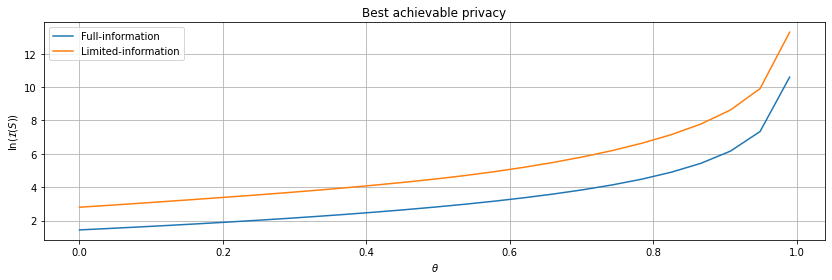

In [12]:
plt.plot(Theta, If, label='Full-information')
plt.plot(Theta, Il, label='Limited-information')
plt.grid()
plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\ln(\mathcal{I}(S))$')
plt.title('Best achievable privacy')
plt.show()

## Privacy-utility trade-off 

### Full-information case

In [13]:
RHO = [0.1, 0.5, 0.9]
LMBD =  np.linspace(1e-4, 35, 25)
V0 = np.zeros((len(RHO), len(LMBD)))
V1 = np.zeros((len(RHO), len(LMBD)))
V = np.zeros((len(RHO), len(LMBD)))
I = np.zeros((len(RHO), len(LMBD)))
theta = 0.
print('Computing policies for different values of rho/lambda')
P0, P1 = build_system(theta)

for i in tqdm(range(len(RHO))):
    for j in tqdm(range(len(LMBD)), leave=False):
        rho = RHO[i]
        lmbd = LMBD[j]
        result, xi1, xi0 = full_information_privacy_utility(rho, lmbd, P0, P1, R0, R1, initial_points=25)
        V0[i,j], V1[i,j], V[i,j] = compute_values(rho, xi0, xi1, R0, R1)
        I[i,j] = full_information_privacy(P0, P1, xi0, xi1)


Computing policies for different values of rho/lambda


C:\Users\alessior\Anaconda3\lib\site-packages\cvxpy\problems\problem.py:1054: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


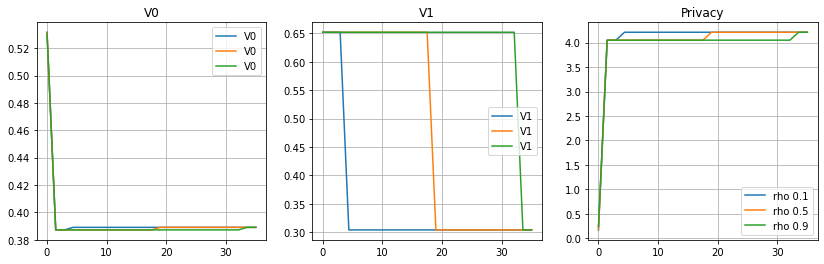

In [14]:
fig, ax = plt.subplots(1, 3)
for i in range(len(RHO)):
    ax[2].plot(LMBD, I[i,:], label='rho {}'.format(RHO[i]))
    ax[0].plot(LMBD, V0[i,:], label='V0')
    ax[1].plot(LMBD, V1[i,:], label='V1')
    
ax[0].set_title('V0')
ax[1].set_title('V1')


ax[2].set_title('Privacy')

for i in range(3):
    ax[i].grid()
    ax[i].legend()

plt.show()